In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1CDKle_lotCdVvBH2maBEKs2xw2H_aniC'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#nfl.txt') 

In [0]:
link = 'https://drive.google.com/open?id=16TFQYSbcxqmsCKGtM17ezv1r92zHqsOX'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#patriots.txt') 

In [0]:
link = 'https://drive.google.com/open?id=1q46x9I4MyPJ2EMBvtz97JoOTQghc0Us5'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#sb49.txt') 

In [0]:
link = 'https://drive.google.com/open?id=1XEM8yOagqt0uQufcZb2Bx3FtuL1yiQIL'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#superbowl.txt') 

In [0]:
link = 'https://drive.google.com/open?id=1P__NlS3CSm_Aw47zRL6kh6p4CG7Vdk8x'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#gohawks.txt') 

In [0]:
link = 'https://drive.google.com/open?id=1jK99nBFS9XFLaiiXTSlPl-tYt8iikmpb'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('tweets_#gopatriots.txt') 

In [0]:
txts = ['tweets_#nfl.txt', 'tweets_#patriots.txt','tweets_#sb49.txt', 
        'tweets_#superbowl.txt', 'tweets_#gohawks.txt', 'tweets_#gopatriots.txt']

# Question 1

In [0]:
import numpy as np
import pandas as pd
import json

def data_processing(txt):
    timestamp = []
    tweets = []
    followers = []
    retweets = []
    with open(txt, 'r') as current_txt:
        for line in current_txt:
            json_object = json.loads(line)
            tweets.append(1)
            timestamp.append(json_object['citation_date'])
            followers.append(json_object['author']['followers'])
            retweets.append(json_object['metrics']['citations']['total'])
        df = pd.DataFrame({'tweets' : tweets,'timestamp' : timestamp,
                           'followers' : followers,
                           'retweeted times' : retweets},
                          columns = ['tweets', 'timestamp', 'followers', 'retweeted times'])
        tweets_per_hour = ((sum(tweets))/((max(timestamp)-min(timestamp))/3600.0))
        print('Average number of tweets per hour is: ', tweets_per_hour)
        average_followers = sum(followers)/(sum(tweets))
        print('Average number of followers of users posting the tweets per tweet is: ', average_followers)
        average_retweets = sum(retweets)/(sum(tweets))
        print('Average number of retweets per tweet is:  ', average_retweets)
        
for txt in txts:
    print('Hashtag: ' + txt[7:-4])
    data_processing(txt)

Hashtag: #nfl
Average number of tweets per hour is:  397.0213901819841
Average number of followers of users posting the tweets per tweet is:  4662.37544523693
Average number of retweets per tweet is:   1.5344602655543254
Hashtag: #patriots
Average number of tweets per hour is:  750.89426460689
Average number of followers of users posting the tweets per tweet is:  3280.4635616550277
Average number of retweets per tweet is:   1.7852871288476946
Hashtag: #sb49
Average number of tweets per hour is:  1276.8570598680474
Average number of followers of users posting the tweets per tweet is:  10374.160292019487
Average number of retweets per tweet is:   2.52713444111402
Hashtag: #superbowl
Average number of tweets per hour is:  2072.11840170408
Average number of followers of users posting the tweets per tweet is:  8814.96799424623
Average number of retweets per tweet is:   2.3911895819207736
Hashtag: #gohawks
Average number of tweets per hour is:  292.48785062173687
Average number of followers 

# Question 2

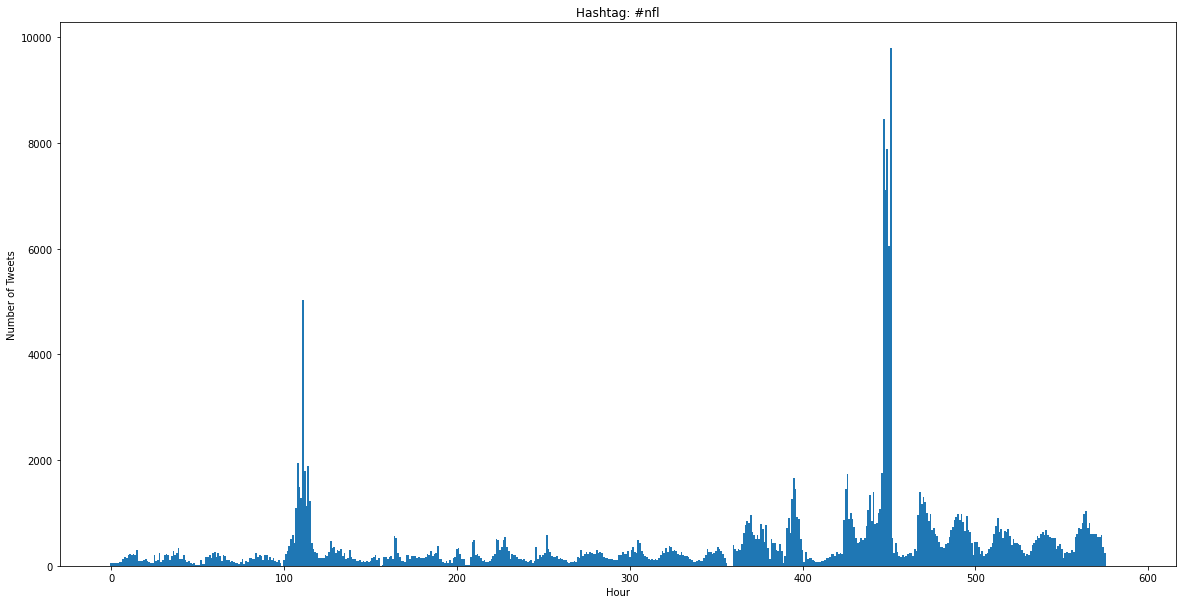

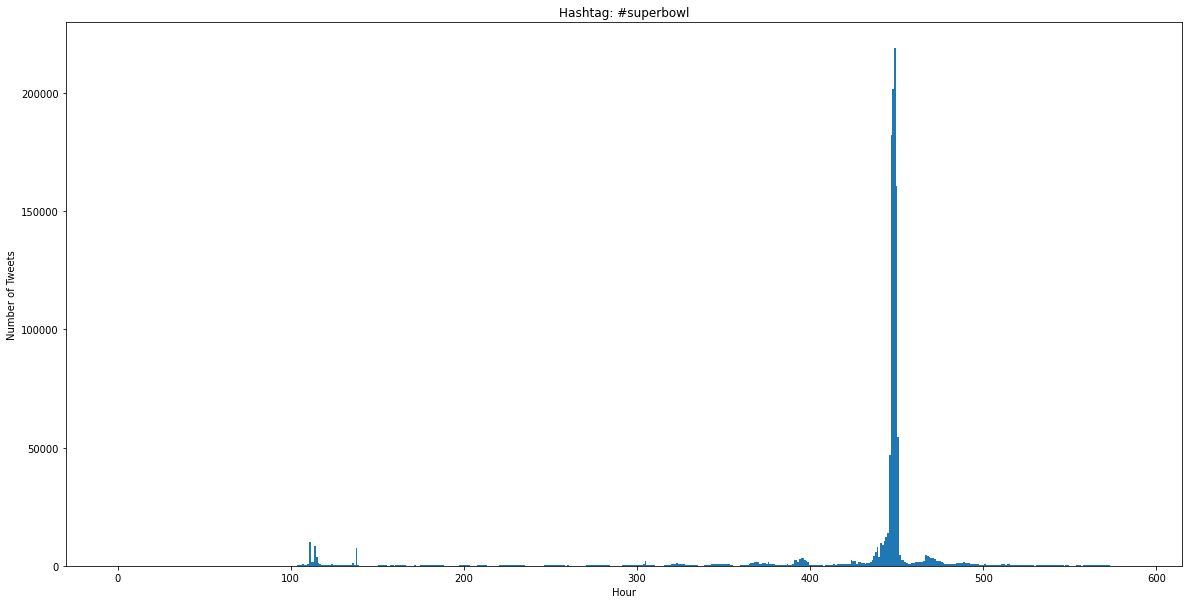

In [0]:
import matplotlib.pyplot as plt

def histogram_helper(txt):
    timestamp = []
    with open(txt, 'r') as current_txt:
        for line in current_txt:
            json_object = json.loads(line)
            timestamp.append(json_object['citation_date'])
        histogram(timestamp, txt)

def histogram(timestamp, txt):
    one_hour_bin = [0] * int((max(timestamp)-min(timestamp))/3600+1)
    start_time = min(timestamp)
    for time in timestamp:
        one_hour_bin[int((time-start_time)/3600)] += 1
    plt.figure(figsize=(20,10))
    plt.bar([i for i in range(0,len(one_hour_bin))], one_hour_bin, width = 1)
    plt.xlabel('Hour')
    plt.ylabel('Number of Tweets')
    plt.title('Hashtag: ' + txt[7:-4])
    plt.show()

for txt in txts:
  if txt in ['tweets_#superbowl.txt','tweets_#nfl.txt']:
    histogram_helper(txt)


# Question 3

In [0]:
import pytz
import datetime
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import RegressionResults
import numpy as np
import pandas as pd
import json
import csv

processed_txts = ['p_tweets_#nfl.txt', 'p_tweets_#patriots.txt','p_tweets_#sb49.txt', 
                  'p_tweets_#superbowl.txt', 'p_tweets_#gohawks.txt', 'p_tweets_#gopatriots.txt']

for i in range(len(txts)):
    with open(txts[i], 'r') as reader:
        headers = ['timestamp_raw','tweets',
                   'retweets','followers','followers_max']
        with open(processed_txts[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                json_object = json.loads(line)
                response =  [json_object['citation_date'],1,
                             json_object['metrics']['citations']['total'],
                             json_object['author']['followers'], 
                             json_object['author']['followers']]
                csv_writer.writerow(response)

def convert_date(txt):
    pst_tz = pytz.timezone('America/Los_Angeles')
    utc_tz = pytz.UTC
    txt['date_pst'] = pd.to_datetime(txt['timestamp_raw'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    txt['date'] = txt['date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    txt['hour'] = txt['date_pst'].apply(lambda x: x.hour)
    txt['minute'] = txt['date_pst'].apply(lambda x: x.minute)

def ols_method(txt):
    training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour", data=txt)
    result = training.fit()
    print("MSE is: ",result.mse_total)
    print(result.summary())

p_nfl = pd.read_csv('p_tweets_#nfl.txt',delimiter=',')
p_patriots = pd.read_csv('p_tweets_#patriots.txt',delimiter=',')
p_sb49 = pd.read_csv('p_tweets_#sb49.txt',delimiter=',')
p_superbowl = pd.read_csv('p_tweets_#superbowl.txt',delimiter=',')
p_gohawks = pd.read_csv('p_tweets_#gohawks.txt',delimiter=',')
p_gopatriots = pd.read_csv('p_tweets_#gopatriots.txt',delimiter=',')

convert_date(p_nfl)
nfl_processed = p_nfl.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
nfl_processed['next_tweets'] = nfl_processed['tweets']
nfl_processed.next_tweets = nfl_processed.next_tweets.shift(-1)
print('#nfl')
ols_method(nfl_processed)

convert_date(p_patriots)
patriots_processed = p_patriots.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
patriots_processed['next_tweets'] = patriots_processed['tweets']
patriots_processed.next_tweets = patriots_processed.next_tweets.shift(-1)
print('#patriots')
ols_method(patriots_processed)

convert_date(p_sb49)
sb49_processed = p_sb49.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
sb49_processed['next_tweets'] = sb49_processed['tweets']
sb49_processed.next_tweets = sb49_processed.next_tweets.shift(-1)
print('#sb49')
ols_method(sb49_processed)

convert_date(p_superbowl)
superbowl_processed = p_superbowl.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
superbowl_processed['next_tweets'] = superbowl_processed['tweets']
superbowl_processed.next_tweets = superbowl_processed.next_tweets.shift(-1)
print('#superbowl')
ols_method(superbowl_processed)

convert_date(p_gohawks)
gohawk_processed = p_gohawks.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
gohawk_processed['next_tweets'] = gohawk_processed['tweets']
gohawk_processed.next_tweets = gohawk_processed.next_tweets.shift(-1)
print('#gohawks')
ols_method(gohawk_processed)

convert_date(p_gopatriots)
gopatriots_processed = p_gopatriots.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max})
gopatriots_processed['next_tweets'] = gopatriots_processed['tweets']
gopatriots_processed.next_tweets = gopatriots_processed.next_tweets.shift(-1)
print('#gopatriots')
ols_method(gopatriots_processed)





#nfl
MSE is:  633429.0070680364
                            OLS Regression Results                            
Dep. Variable:            next_tweets   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          3.57e-103
Time:                        22:51:13   Log-Likelihood:                -4467.0
No. Observations:                 582   AIC:                             8946.
Df Residuals:                     576   BIC:                             8972.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     

# Question 4

In [0]:
import pytz
import datetime
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import RegressionResults
import numpy as np
import pandas as pd
import json
import csv


processed_txts = ['p_tweets_#nfl.txt', 'p_tweets_#patriots.txt','p_tweets_#sb49.txt', 
                  'p_tweets_#superbowl.txt', 'p_tweets_#gohawks.txt', 'p_tweets_#gopatriots.txt']

for i in range(len(txts)):
    with open(txts[i], 'r') as reader:
        headers = ['timestamp_raw','tweets',
                   'retweets','followers','followers_max','mentions','urls']
        with open(processed_txts[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                json_object = json.loads(line)
                response =  [json_object['citation_date'],1,
                             json_object['metrics']['citations']['total'],
                             json_object['author']['followers'], 
                             json_object['author']['followers'],
                             len(json_object['tweet']['entities']['urls']),
                             len(json_object['tweet']['entities']['user_mentions'])]
                csv_writer.writerow(response)

def convert_date(txt):
    pst_tz = pytz.timezone('America/Los_Angeles')
    utc_tz = pytz.UTC
    txt['date_pst'] = pd.to_datetime(txt['timestamp_raw'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    txt['date'] = txt['date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    txt['hour'] = txt['date_pst'].apply(lambda x: x.hour)
    txt['minute'] = txt['date_pst'].apply(lambda x: x.minute)

def ols_method(txt):
    training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=txt)
    result = training.fit()
    print("MSE is: ",result.mse_total)
    print(result.summary())

p_nfl = pd.read_csv('p_tweets_#nfl.txt',delimiter=',')
p_patriots = pd.read_csv('p_tweets_#patriots.txt',delimiter=',')
p_sb49 = pd.read_csv('p_tweets_#sb49.txt',delimiter=',')
p_superbowl = pd.read_csv('p_tweets_#superbowl.txt',delimiter=',')
p_gohawks = pd.read_csv('p_tweets_#gohawks.txt',delimiter=',')
p_gopatriots = pd.read_csv('p_tweets_#gopatriots.txt',delimiter=',')

convert_date(p_nfl)
nfl_processed = p_nfl.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
nfl_processed['next_tweets'] = nfl_processed['tweets']
nfl_processed.next_tweets = nfl_processed.next_tweets.shift(-1)
print('#nfl')
ols_method(nfl_processed)

convert_date(p_patriots)
patriots_processed = p_patriots.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
patriots_processed['next_tweets'] = patriots_processed['tweets']
patriots_processed.next_tweets = patriots_processed.next_tweets.shift(-1)
print('#patriots')
ols_method(patriots_processed)

convert_date(p_sb49)
sb49_processed = p_sb49.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
sb49_processed['next_tweets'] = sb49_processed['tweets']
sb49_processed.next_tweets = sb49_processed.next_tweets.shift(-1)
print('#sb49')
ols_method(sb49_processed)

convert_date(p_superbowl)
superbowl_processed = p_superbowl.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
superbowl_processed['next_tweets'] = superbowl_processed['tweets']
superbowl_processed.next_tweets = superbowl_processed.next_tweets.shift(-1)
print('#superbowl')
ols_method(superbowl_processed)

convert_date(p_gohawks)
gohawk_processed = p_gohawks.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
gohawk_processed['next_tweets'] = gohawk_processed['tweets']
gohawk_processed.next_tweets = gohawk_processed.next_tweets.shift(-1)
print('#gohawks')
ols_method(gohawk_processed)

convert_date(p_gopatriots)
gopatriots_processed = p_gopatriots.groupby(pd.Grouper(key='date_pst',freq='60Min')).agg({'tweets':np.sum,'retweets':np.sum,
                                                                              'followers':np.sum,'followers_max':np.max,
                                                                              'hour':np.max, 'mentions':np.sum,'urls':np.sum})
gopatriots_processed['next_tweets'] = gopatriots_processed['tweets']
gopatriots_processed.next_tweets = gopatriots_processed.next_tweets.shift(-1)
print('#gopatriots')
ols_method(gopatriots_processed)

KeyboardInterrupt: ignored

# Question 5

# #nfl

In [0]:
import matplotlib.pyplot as plt

training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=nfl_processed)
nfl_model = training.fit()
nfl_predict = nfl_model.predict(nfl_processed)


plt.plot(list(nfl_predict), list(nfl_processed['mentions']), 'o')
plt.title('#nfl number of mentions per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of mentions per tweet')
plt.show()

plt.plot(list(nfl_predict), list(nfl_processed['urls']), 'o')
plt.title('#nfl number of urls per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of urls per tweet')
plt.show()

plt.plot(list(nfl_predict), list(nfl_processed['retweets']), 'o')
plt.title('#nfl number of retweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of retweets')
plt.show()

# #patriots

In [0]:
training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=patriots_processed)
patriots_model = training.fit()
patriots_predict = patriots_model.predict(patriots_processed)


plt.plot(list(patriots_predict), list(patriots_processed['tweets']), 'o')
plt.title('#patriots number of tweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of tweets')
plt.show()

plt.plot(list(patriots_predict), list(patriots_processed['followers']), 'o')
plt.title('#patriots number of followers')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of followers')
plt.show()

plt.plot(list(patriots_predict), list(patriots_processed['followers_max']), 'o')
plt.title('#patriots maximum number of followers')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('maximum number of followers')
plt.show()

# #sb49

In [0]:
training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=sb49_processed)
sb49_model = training.fit()
sb49_predict = sb49_model.predict(sb49_processed)


plt.plot(list(sb49_predict), list(sb49_processed['tweets']), 'o')
plt.title('#sb49 number of tweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of tweets')
plt.show()

plt.plot(list(sb49_predict), list(sb49_processed['followers']), 'o')
plt.title('#sb49 number of followers')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of followers')
plt.show()

plt.plot(list(sb49_predict), list(sb49_processed['mentions']), 'o')
plt.title('#sb49 number of mentions per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of mentions per tweet')
plt.show()

# #superbowl

In [0]:
training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=superbowl_processed)
superbowl_model = training.fit()
superbowl_predict = superbowl_model.predict(superbowl_processed)


plt.plot(list(superbowl_predict), list(superbowl_processed['retweets']), 'o')
plt.title('#superbowl number of retweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of retweets')
plt.show()

plt.plot(list(superbowl_predict), list(superbowl_processed['urls']), 'o')
plt.title('#superbowl number of urls per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of urls per tweet')
plt.show()

plt.plot(list(superbowl_predict), list(superbowl_processed['tweets']), 'o')
plt.title('#superbowl number of tweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of tweets')
plt.show()

# #gohawks

In [0]:
training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=gohawk_processed)
gohawks_model = training.fit()
gohawks_predict = gohawks_model.predict(gohawk_processed)


plt.plot(list(gohawks_predict), list(gohawk_processed['tweets']), 'o')
plt.title('#gohawks number of tweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of tweets')
plt.show()

plt.plot(list(gohawks_predict), list(gohawk_processed['followers']), 'o')
plt.title('#gohawks number of followers')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of followers')
plt.show()

plt.plot(list(gohawks_predict), list(gohawk_processed['mentions']), 'o')
plt.title('#gohawks number of mentions per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of mentions per tweet')
plt.show()

# #gopatriots

In [0]:
training = ols("next_tweets ~ tweets + retweets + followers + followers_max + hour + mentions + urls", data=gopatriots_processed)
gopatriots_model = training.fit()
gopatriots_predict = gopatriots_model.predict(gopatriots_processed)


plt.plot(list(gopatriots_predict), list(gopatriots_processed['retweets']), 'o')
plt.title('#gopatriots number of retweets')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of retweets')
plt.show()

plt.plot(list(gopatriots_predict), list(gopatriots_processed['mentions']), 'o')
plt.title('#gopatriots number of mentions per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of mentions per tweet')
plt.show()

plt.plot(list(gopatriots_predict), list(gopatriots_processed['urls']), 'o')
plt.title('#gopatriots number of urls per tweet')
plt.xlabel('Predicted Number of Tweets for Next Hour')
plt.ylabel('number of urls per tweet')
plt.show()



# Question 6

In [0]:
import datetime,time
import pytz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean
from sklearn.model_selection import KFold
import statsmodels.api as sm
from statsmodels.api import tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
topics = ["nfl", "patriots", "sb49", "superbowl", "gohawks", "gopatriots"]

In [0]:
def transfer_time(data_raw,time_type):
    
    pst_tz = pytz.timezone('America/Los_Angeles')
    
    pddata_raw = pd.DataFrame(data_raw,columns=['time','tweets','retweets','followers','mentioned','media','active','author','favourites_count','title'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)               
    if time_type == 'hour':
        hour_accu = []
        for index, row in pddata_raw.iterrows():  
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)  
            hour_accu.append(((p.month-1)*31+p.day-14)*24+p.hour)                             
        pddata_raw['time'] = hour_accu
    elif time_type == 'minute':
        minu_accu = []
        for index, row in pddata_raw.iterrows():  
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)                    
            minu_accu.append((((p.month-1)*31+p.day-14)*24 + (p.hour-0))*12 + p.minute//5)             
        pddata_raw['time'] = minu_accu    
    else:
        print("Invalid time type")
        
    return pddata_raw

def generate_df(pddata_raw):

    df = pd.DataFrame([],columns=['time unit','tweets','retweets','followers sum','followers max','mentioned','media','active','author','favourites_count','title'])
    
    col = pddata_raw.columns.get_loc('time')
    df['time unit'] = range(int(pddata_raw.iloc[len(pddata_raw.index)-1,col] - pddata_raw.iloc[0,col]+1))

    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['mentioned'] = pddata_raw.groupby("time")['mentioned'].sum()
    df['media'] = pddata_raw.groupby("time")['media'].sum()
    df['active'] = pddata_raw.groupby("time")['active'].mean()  
    df['author'] = pddata_raw.groupby("time")['author'].nunique() # count number of not-repeating authors    
    df['favourites_count'] = pddata_raw.groupby("time")['favourites_count'].sum()
    df['title'] = pddata_raw.groupby("time")['title'].mean()
    df = df.fillna(0).reset_index(drop=True)
    
    return df

In [0]:
def parse_dataset(txt):
    start_time = time.mktime(time.strptime("2015-02-01 08:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-01 20:00:00",'%Y-%m-%d %H:%M:%S'))   

    start_hour_idx = ((2-1)*31+1-14)*24+8
    end_hour_idx = ((2-1)*31+1-14)*24+20
    start_minute_idx = (((2-1)*31+1-14)*24 + (8-0))*12 + 0//5    

    data_raw = [[],[],[]]
    with open(txt, 'r') as current_txt:
        for line in current_txt:
          row_tmp = []
          a = json.loads(line)
          citation_date = a['citation_date']
          tweet = 1
          retweet = a['metrics']['citations']['total']
          foll = a['author']['followers']             
          ment = len(a['tweet']['entities']['user_mentions'])        
          medi = len(a['tweet']['extended_entities']['media']) if 'extended_entities' in a['tweet'] else 0
          hist_tw = a['tweet']['user']["statuses_count"]
          hist_yr = a['tweet']['user']['created_at'][-4:]
          acti = hist_tw/(2015-float(hist_yr)+1) 
          auth = a['author']['name']
          favo = a['tweet']['user']['favourites_count']
          titl = len(a['title'])
        
          row_tmp.append(citation_date)        
          row_tmp.append(tweet)        
          row_tmp.append(retweet)
          row_tmp.append(foll)    
          row_tmp.append(ment) 
          row_tmp.append(medi) 
          row_tmp.append(acti)  
          row_tmp.append(auth)
          row_tmp.append(favo)
          row_tmp.append(titl)
        
          if citation_date < start_time:
              data_raw[0].append(row_tmp)
          elif citation_date < end_time:
              data_raw[1].append(row_tmp)
          else:
              data_raw[2].append(row_tmp)            

    pddata_raw_1 = transfer_time(data_raw[0],'hour')
    pddata_raw_2 = transfer_time(data_raw[1],'minute')
    pddata_raw_2['time'] = pddata_raw_2['time'] - start_minute_idx
    pddata_raw_3 = transfer_time(data_raw[2],'hour')
    pddata_raw_3['time'] = pddata_raw_3['time'] - end_hour_idx - 1    
            
    df_1 = generate_df(pddata_raw_1)  
    df_y_1 = df_1.iloc[1:,1].reset_index(drop=True)
    df_1 = df_1[:len(df_y_1)]
    
    df_2 = generate_df(pddata_raw_2)
    df_y_2 = df_2.iloc[1:,1].reset_index(drop=True)
    df_2 = df_2[:len(df_y_2)]
   
    df_3 = generate_df(pddata_raw_3)
    df_y_3 = df_3.iloc[1:,1].reset_index(drop=True)
    df_3 = df_3[:len(df_y_3)]
    
    return (df_1.iloc[:,1:],df_y_1), (df_2.iloc[:,1:],df_y_2), (df_3.iloc[:,1:],df_y_3)

In [0]:
def train_lr(txt):  
    (df_1,df_y_1),(df_2,df_y_2),(df_3,df_y_3) = parse_dataset(txt)
    print('Parse data finished','\n')

    reg_1 = LinearRegression().fit(df_1, df_y_1)
    pred_y_1 = reg_1.predict(df_1)
    MSE_1 = mean_squared_error(df_y_1, pred_y_1)
    R2_1 = r2_score(df_y_1, pred_y_1)    
    print(topics[i], ' of time period 1')
    print('MSE for test data = ',MSE_1)
    print('R2 score for test data = ',R2_1,'\n')   

    reg_2 = LinearRegression().fit(df_2, df_y_2)
    pred_y_2 = reg_2.predict(df_2)
    MSE_2 = mean_squared_error(df_y_2, pred_y_2)
    R2_2 = r2_score(df_y_2, pred_y_2)    
    print(topics[i], ' of time period 2')
    print('MSE for test data = ',MSE_2)
    print('R2 score for test data = ',R2_2,'\n') 

    reg_3 = LinearRegression().fit(df_3, df_y_3)
    pred_y_3 = reg_3.predict(df_3)
    MSE_3 = mean_squared_error(df_y_3, pred_y_3)
    R2_3 = r2_score(df_y_3, pred_y_3)    
    print(topics[i], ' of time period 3')
    print('MSE for test data = ',MSE_3)
    print('R2 score for test data = ',R2_3,'\n') 
    
    return (df_1, df_y_1, pred_y_1), (df_2, df_y_2, pred_y_2), (df_3, df_y_3, pred_y_3)

In [0]:
for txt in txts:
    print(txt[7:-4])
    (df_1, df_y_1, pred_y_1), (df_2, df_y_2, pred_y_2), (df_3, df_y_3, pred_y_3) = train_lr(txt)

# Question 7

In [0]:
def parse_dataset_2(files):
    start_time = time.mktime(time.strptime("2015-02-01 08:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-01 20:00:00",'%Y-%m-%d %H:%M:%S'))   

    start_hour_idx = ((2-1)*31+1-14)*24+8
    end_hour_idx = ((2-1)*31+1-14)*24+20
    start_minute_idx = (((2-1)*31+1-14)*24 + (8-0))*12 + 0//5    
        
    data_raw = [[],[],[]]
    for txt in txts:
        with open(txt, 'r') as current_txt:
          for line in current_txt:
            row_tmp = []
            a = json.loads(line)
            citation_date = a['citation_date']
            tweet = 1
            retweet = a['metrics']['citations']['total']
            foll = a['author']['followers']             
            ment = len(a['tweet']['entities']['user_mentions'])        
            medi = len(a['tweet']['extended_entities']['media']) if 'extended_entities' in a['tweet'] else 0
            hist_tw = a['tweet']['user']["statuses_count"]
            hist_yr = a['tweet']['user']['created_at'][-4:]
            acti = hist_tw/(2015-float(hist_yr)+1) 
            auth = a['author']['name']
            favo = a['tweet']['user']['favourites_count']
            titl = len(a['title'])

            row_tmp.append(citation_date)        
            row_tmp.append(tweet)        
            row_tmp.append(retweet)
            row_tmp.append(foll)    
            row_tmp.append(ment) 
            row_tmp.append(medi) 
            row_tmp.append(acti)  
            row_tmp.append(auth)
            row_tmp.append(favo)
            row_tmp.append(titl)

            # assign to 3 periods
            if citation_date < start_time:
                data_raw[0].append(row_tmp)
            elif citation_date < end_time:
                data_raw[1].append(row_tmp)
            else:
                data_raw[2].append(row_tmp)            

    pddata_raw_1 = transfer_time(data_raw[0],'hour')
    pddata_raw_2 = transfer_time(data_raw[1],'minute')
    pddata_raw_2['time'] = pddata_raw_2['time'] - start_minute_idx
    pddata_raw_3 = transfer_time(data_raw[2],'hour')
    pddata_raw_3['time'] = pddata_raw_3['time'] - end_hour_idx - 1    
            
    df_1 = generate_df(pddata_raw_1)  
    df_y_1 = df_1.iloc[1:,1].reset_index(drop=True)
    df_1 = df_1[:len(df_y_1)]
    
    df_2 = generate_df(pddata_raw_2)
    df_y_2 = df_2.iloc[1:,1].reset_index(drop=True)
    df_2 = df_2[:len(df_y_2)]
   
    df_3 = generate_df(pddata_raw_3)
    df_y_3 = df_3.iloc[1:,1].reset_index(drop=True)
    df_3 = df_3[:len(df_y_3)]
    
    return (df_1.iloc[:,1:],df_y_1), (df_2.iloc[:,1:],df_y_2), (df_3.iloc[:,1:],df_y_3)

In [0]:
def train_lr_2(files):
    (df_1,df_y_1),(df_2,df_y_2),(df_3,df_y_3) = parse_dataset_2(files)
    print('Parse data finished','\n')

    reg_1 = LinearRegression().fit(df_1, df_y_1)
    pred_y_1 = reg_1.predict(df_1)
    MSE_1 = mean_squared_error(df_y_1, pred_y_1)
    R2_1 = r2_score(df_y_1, pred_y_1)    
    print('Time period 1')
    print('MSE for test data = ',MSE_1)
    print('R2 score for test data = ',R2_1,'\n')   

    reg_2 = LinearRegression().fit(df_2, df_y_2)
    pred_y_2 = reg_2.predict(df_2)
    MSE_2 = mean_squared_error(df_y_2, pred_y_2)
    R2_2 = r2_score(df_y_2, pred_y_2)    
    print('Time period 2')
    print('MSE for test data = ',MSE_2)
    print('R2 score for test data = ',R2_2,'\n') 

    reg_3 = LinearRegression().fit(df_3, df_y_3)
    pred_y_3 = reg_3.predict(df_3)
    MSE_3 = mean_squared_error(df_y_3, pred_y_3)
    R2_3 = r2_score(df_y_3, pred_y_3)    
    print('Time period 3')
    print('MSE for test data = ',MSE_3)
    print('R2 score for test data = ',R2_3,'\n') 
    
    return (df_1, df_y_1, pred_y_1), (df_2, df_y_2, pred_y_2), (df_3, df_y_3, pred_y_3)

In [0]:
(df_1, df_y_1, pred_y_1), (df_2, df_y_2, pred_y_2), (df_3, df_y_3, pred_y_3) = train_lr_2(txts)

# Question 8

In [0]:
def parse_dataset_ten_features(file):
    pst_tz = pytz.timezone('America/Los_Angeles')
    data_raw = []
    with open(txt, 'r') as current_txt:
          for line in current_txt:
            row_tmp = []
            a = json.loads(line)
            citation_date = a['citation_date']
            retweet = a['metrics']['citations']['total']
            foll = a['author']['followers']             
            ment = len(a['tweet']['entities']['user_mentions'])        
            medi = len(a['tweet']['extended_entities']['media']) if 'extended_entities' in a['tweet'] else 0
            hist_tw = a['tweet']['user']["statuses_count"]
            hist_yr = a['tweet']['user']['created_at'][-4:]
            acti = hist_tw/(2015-float(hist_yr)+1) 
            auth = a['author']['name']
            favo = a['tweet']['user']['favourites_count']
            titl = len(a['title'])

            row_tmp.append(citation_date)
            row_tmp.append(retweet)
            row_tmp.append(foll)    
            row_tmp.append(ment) 
            row_tmp.append(medi) 
            row_tmp.append(acti)  
            row_tmp.append(auth)
            row_tmp.append(favo)
            row_tmp.append(titl)        
            data_raw.append(row_tmp)
    
    pddata_raw = pd.DataFrame(data_raw,columns=['time','retweets','followers','mentioned','media', 'active','author','favourites_count','title'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)
    pddata_raw['tweets'] = 1                   

    hour_accu = []
    hour_day = []
    for index, row in pddata_raw.iterrows():  
        p = datetime.datetime.fromtimestamp(row["time"], pst_tz)  
        hour_accu.append(((p.month-1)*31+p.day-14)*24+p.hour)
        hour_day.append(p.hour)    
    pddata_raw["time"] = hour_accu
    pddata_raw["hour of day"] = hour_day
    
    df = pd.DataFrame([],columns=['hour index','tweets','retweets','followers sum','followers max','mentioned','media','active','author','favourites_count','title'])
    df['hour index'] = range(pddata_raw.iloc[len(pddata_raw.index)-1,0]+1)
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['mentioned'] = pddata_raw.groupby("time")['mentioned'].sum()
    df['media'] = pddata_raw.groupby("time")['media'].sum()
    df['active'] = pddata_raw.groupby("time")['active'].mean()  
    df['author'] = pddata_raw.groupby("time")['author'].nunique() # count number of not-repeating authors    
    df['favourites_count'] = pddata_raw.groupby("time")['favourites_count'].sum()
    df['title'] = pddata_raw.groupby("time")['title'].mean()
    df = df.drop([0]).fillna(0).reset_index(drop=True)
    df_y = df.iloc[1:,1].reset_index(drop=True)
    df = df[:len(df_y)]
    
    return df.iloc[:,1:],df_y

In [0]:
df, df_y = parse_dataset_ten_features(txt[0])
for i in range(1,6):
    df_temp,df_temp_y=parse_dataset_ten_features(txt[i])
    df=df.append(df_temp,ignore_index=True)
    df_y=df_y.append(df_temp_y,ignore_index=True)
    print(df_temp.shape,df.shape)
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [0]:
avg_RMSE_train=np.zeros((8,1))
avg_RMSE_test=np.zeros((8,1))
max_depth=[10, 20, 40, 60, 80, 100, 200, None]
for i in range (0,8):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    depth=max_depth[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        RF = RandomForestRegressor(oob_score=True,n_estimators=200,max_depth=depth,min_samples_leaf=1,min_samples_split=2,max_features='auto',random_state=42)
        RF.fit(X_train,y_train)
        pred_train = RF.predict(X_train)
        pred_test = RF.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max depth: ",depth)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((2,1))
avg_RMSE_test=np.zeros((2,1))
max_features=['auto', 'sqrt']
for i in range (0,2):
    MSE_test=[]
    total_train=0
    total_test=0
    feature=max_features[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        RF = RandomForestRegressor(oob_score=True,n_estimators=200,max_depth=20,min_samples_leaf=1,min_samples_split=2,max_features=feature,random_state=42)
        RF.fit(X_train,y_train)
        pred_train = RF.predict(X_train)
        pred_test = RF.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max features: ",feature)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((4,1))
avg_RMSE_test=np.zeros((4,1))
min_samples_leaf=[1,2,3,4]
for i in range (0,4):
    MSE_test=[]
    total_train=0
    total_test=0
    leaf=min_samples_leaf[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        RF = RandomForestRegressor(oob_score=True,n_estimators=200,max_depth=20,min_samples_leaf=leaf,min_samples_split=2,max_features='sqrt',random_state=42)
        RF.fit(X_train,y_train)
        pred_train = RF.predict(X_train)
        pred_test = RF.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples leaf: ",leaf)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((3,1))
avg_RMSE_test=np.zeros((3,1))
min_samples_split=[2, 5, 10]
for i in range (0,3):
    MSE_test=[]
    total_train=0
    total_test=0
    split=min_samples_split[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        RF = RandomForestRegressor(oob_score=True,n_estimators=200,max_depth=20,min_samples_leaf=1,min_samples_split=split,max_features='sqrt',random_state=42)
        RF.fit(X_train,y_train)
        pred_train = RF.predict(X_train)
        pred_test = RF.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples split ",split)
    print("RMSE_train ",avg_RMSE_train[i])
    print("RMSE_test ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((10,1))
avg_RMSE_test=np.zeros((10,1))
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in range (0,10):
    MSE_test=[]
    total_train=0
    total_test=0
    estimator=n_estimators[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        RF = RandomForestRegressor(oob_score=True,n_estimators=estimator,max_depth=20,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',random_state=42)
        RF.fit(X_train,y_train)
        pred_train = RF.predict(X_train)
        pred_test = RF.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("n_estimators: ",estimator)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((8,1))
avg_RMSE_test=np.zeros((8,1))
max_depth=[10, 20, 40, 60, 80, 100, 200, None]
for i in range (0,8):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    depth=max_depth[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=depth,min_samples_leaf=1,min_samples_split=2, max_features='auto',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max depth: ",depth)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((2,1))
avg_RMSE_test=np.zeros((2,1))
max_features=['auto', 'sqrt']
for i in range (0,2):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    feature=max_features[i]
    for train_index, test_index in kf.split(df):
        X_train=df.iloc[train_index]
        y_train=df_y.iloc[train_index]
        X_test=df.iloc[test_index]
        y_test=df_y.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=1,min_samples_split=2, max_features=feature,random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max features: ",feature)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((4,1))
avg_RMSE_test=np.zeros((4,1))
min_samples_leaf=[1, 2, 3, 4]
for i in range (0,4):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    leaf=min_samples_leaf[i]
    for train_index, test_index in kf.split(df):
        X_train=df.iloc[train_index]
        y_train=df_y.iloc[train_index]
        X_test=df.iloc[test_index]
        y_test=df_y.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=leaf,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples leaf: ",leaf)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((3,1))
avg_RMSE_test=np.zeros((3,1))
min_samples_split=[2, 5, 10]
for i in range (0,3):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    split=min_samples_split[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=3,min_samples_split=split, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples split: ",split)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((10,1))
avg_RMSE_test=np.zeros((10,1))
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in range (0,10):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    estimator=n_estimators[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=estimator,max_depth=10,min_samples_leaf=3,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("n estimators: ",estimator)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
GB = GradientBoostingRegressor(n_estimators=800,max_depth=depth,min_samples_leaf=1,min_samples_split=2, max_features='sqrt',random_state=42)
X = df.iloc[:,:].values
y = df_y.iloc[:].values
GB.fit(X,y)
GB.score(X,y)

# Question 9

In [0]:
X_2 = sm.add_constant(df)
y = df_y.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.5, random_state=42)
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

y_predict = ols.predict(X_test)
ols_mse = tools.eval_measures.mse(y_test, y_predict)

print("MSE for aggregated data:", ols_mse)

# Question 10

In [0]:
import json
import datetime
import pytz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean
import statsmodels.api as sm
import datetime,time

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [0]:
def parse_dataset_ten_features(txt):
    # extract raw features
    pst_tz = pytz.timezone('America/Los_Angeles')
    data_raw = []
    with open(txt, 'r', encoding="utf-8") as current_txt:
      for line in current_txt:
        row_tmp = []
        a = json.loads(line)
        citation_date = a['citation_date']
        retweet = a['metrics']['citations']['total']
        foll = a['author']['followers']             
        ment = len(a['tweet']['entities']['user_mentions'])        
        medi = len(a['tweet']['extended_entities']['media']) if 'extended_entities' in a['tweet'] else 0
        hist_tw = a['tweet']['user']["statuses_count"]
        hist_yr = a['tweet']['user']['created_at'][-4:]
        acti = hist_tw/(2015-float(hist_yr)+1) 
        auth = a['author']['name']
        favo = a['tweet']['user']['favourites_count']
        titl = len(a['title'])
        
        # append to list
        row_tmp.append(citation_date)
        row_tmp.append(retweet)
        row_tmp.append(foll)    
        row_tmp.append(ment) 
        row_tmp.append(medi) 
        row_tmp.append(acti)  
        row_tmp.append(auth)
        row_tmp.append(favo)
        row_tmp.append(titl)        
        data_raw.append(row_tmp)
    
    # sort according to time
    pddata_raw = pd.DataFrame(data_raw,columns=['time','retweets','followers','mentioned','media',\
                                                'active','author','favourites_count','title'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)
    pddata_raw['tweets'] = 1                   
#     print(pddata_raw)

    # reset time to hour index
    hour_accu = []
    hour_day = []
    for index, row in pddata_raw.iterrows():  
        p = datetime.datetime.fromtimestamp(row["time"], pst_tz)  
        hour_accu.append(((p.month-1)*31+p.day-14)*24+p.hour)
        hour_day.append(p.hour)    
    pddata_raw["time"] = hour_accu
    pddata_raw["hour of day"] = hour_day
    
    # create a new dataframe with desired form
    df = pd.DataFrame([],columns=['hour index','tweets','retweets','followers sum','followers max','mentioned','media','active','author','favourites_count','title'])
    df['hour index'] = range(pddata_raw.iloc[len(pddata_raw.index)-1,0]+1)
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['mentioned'] = pddata_raw.groupby("time")['mentioned'].sum()
    df['media'] = pddata_raw.groupby("time")['media'].sum()
    df['active'] = pddata_raw.groupby("time")['active'].mean()  
    df['author'] = pddata_raw.groupby("time")['author'].nunique() # count number of not-repeating authors    
    df['favourites_count'] = pddata_raw.groupby("time")['favourites_count'].sum()
    df['title'] = pddata_raw.groupby("time")['title'].mean()
            
    # reset index of df
    df = df.drop([0]).fillna(0).reset_index(drop=True)

    # assign number of tweets of the next hour to be the target value
    df_y = df.iloc[1:,1].reset_index(drop=True)
    df = df[:len(df_y)]
    
    return df.iloc[:,1:],df_y

In [0]:
df, df_y = parse_dataset_ten_features(txts[0])
for txt in txts:
    df_temp,df_temp_y=parse_dataset_ten_features(txt)
    df=df.append(df_temp,ignore_index=True)
    df_y=df_y.append(df_temp_y,ignore_index=True)
    print(df_temp.shape,df.shape)

In [0]:
param_grid={
'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000,
1200, 1400, 1600, 1800, 2000]
}
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [0]:
(df,df_y),(df_2,df_y_2),(df_3,df_y_3) = parse_dataset_2(txts)

In [0]:
avg_RMSE_train=np.zeros((8,1))
avg_RMSE_test=np.zeros((8,1))
max_depth=[10, 20, 40, 60, 80, 100, 200, None]
for i in range (0,8):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    depth=max_depth[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=depth,min_samples_leaf=1,min_samples_split=2, max_features='auto',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max depth: ",depth)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((2,1))
avg_RMSE_test=np.zeros((2,1))
max_features=['auto', 'sqrt']
for i in range (0,2):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    feature=max_features[i]
    for train_index, test_index in kf.split(df):
        X_train=df.iloc[train_index]
        y_train=df_y.iloc[train_index]
        X_test=df.iloc[test_index]
        y_test=df_y.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=1,min_samples_split=2, max_features=feature,random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max features: ",feature)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((4,1))
avg_RMSE_test=np.zeros((4,1))
min_samples_leaf=[1, 2, 3, 4]
for i in range (0,4):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    leaf=min_samples_leaf[i]
    for train_index, test_index in kf.split(df):
        X_train=df.iloc[train_index]
        y_train=df_y.iloc[train_index]
        X_test=df.iloc[test_index]
        y_test=df_y.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=leaf,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples leaf: ",leaf)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((3,1))
avg_RMSE_test=np.zeros((3,1))
min_samples_split=[2, 5, 10]
for i in range (0,3):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    split=min_samples_split[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=3,min_samples_split=split, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples split: ",split)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((10,1))
avg_RMSE_test=np.zeros((10,1))
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in range (0,10):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    estimator=n_estimators[i]
    for train_index, test_index in kf.split(df):
        X_train= df.iloc[train_index]
        y_train= df_y.iloc[train_index]
        X_test= df.iloc[test_index]
        y_test= df_y.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=estimator,max_depth=10,min_samples_leaf=3,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("n estimators: ",estimator)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((8,1))
avg_RMSE_test=np.zeros((8,1))
max_depth=[10, 20, 40, 60, 80, 100, 200, None]
for i in range (0,8):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    depth=max_depth[i]
    for train_index, test_index in kf.split(df_2):
        X_train= df_2.iloc[train_index]
        y_train= df_y_2.iloc[train_index]
        X_test= df_2.iloc[test_index]
        y_test= df_y_2.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=depth,min_samples_leaf=1,min_samples_split=2, max_features='auto',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max depth: ",depth)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((2,1))
avg_RMSE_test=np.zeros((2,1))
max_features=['auto', 'sqrt']
for i in range (0,2):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    feature=max_features[i]
    for train_index, test_index in kf.split(df_2):
        X_train=df_2.iloc[train_index]
        y_train=df_y_2.iloc[train_index]
        X_test=df_2.iloc[test_index]
        y_test=df_y_2.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=100,min_samples_leaf=1,min_samples_split=2, max_features=feature,random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max features: ",feature)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((4,1))
avg_RMSE_test=np.zeros((4,1))
min_samples_leaf=[1, 2, 3, 4]
for i in range (0,4):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    leaf=min_samples_leaf[i]
    for train_index, test_index in kf.split(df_2):
        X_train=df_2.iloc[train_index]
        y_train=df_y_2.iloc[train_index]
        X_test=df_2.iloc[test_index]
        y_test=df_y_2.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=leaf,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples leaf: ",leaf)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((3,1))
avg_RMSE_test=np.zeros((3,1))
min_samples_split=[2, 5, 10]
for i in range (0,3):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    split=min_samples_split[i]
    for train_index, test_index in kf.split(df_2):
        X_train= df_2.iloc[train_index]
        y_train= df_y_2.iloc[train_index]
        X_test= df_2.iloc[test_index]
        y_test= df_y_2.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=4,min_samples_split=split, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples split: ",split)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((10,1))
avg_RMSE_test=np.zeros((10,1))
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in range (0,10):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    estimator=n_estimators[i]
    for train_index, test_index in kf.split(df_2):
        X_train= df_2.iloc[train_index]
        y_train= df_y_2.iloc[train_index]
        X_test= df_2.iloc[test_index]
        y_test= df_y_2.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=estimator,max_depth=10,min_samples_leaf=4,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("n estimators: ",estimator)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((8,1))
avg_RMSE_test=np.zeros((8,1))
max_depth=[10, 20, 40, 60, 80, 100, 200, None]
for i in range (0,8):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    depth=max_depth[i]
    for train_index, test_index in kf.split(df_3):
        X_train= df_3.iloc[train_index]
        y_train= df_y_3.iloc[train_index]
        X_test= df_3.iloc[test_index]
        y_test= df_y_3.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=depth,min_samples_leaf=1,min_samples_split=2, max_features='auto',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max depth: ",depth)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((2,1))
avg_RMSE_test=np.zeros((2,1))
max_features=['auto', 'sqrt']
for i in range (0,2):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    feature=max_features[i]
    for train_index, test_index in kf.split(df_3):
        X_train=df_3.iloc[train_index]
        y_train=df_y_3.iloc[train_index]
        X_test=df_3.iloc[test_index]
        y_test=df_y_3.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=1,min_samples_split=2, max_features=feature,random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("max features: ",feature)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((4,1))
avg_RMSE_test=np.zeros((4,1))
min_samples_leaf=[1, 2, 3, 4]
for i in range (0,4):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    leaf=min_samples_leaf[i]
    for train_index, test_index in kf.split(df_3):
        X_train=df_3.iloc[train_index]
        y_train=df_y_3.iloc[train_index]
        X_test=df_3.iloc[test_index]
        y_test=df_y_3.iloc[test_index]
        GB=GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=leaf,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train=GB.predict(X_train)
        pred_test=GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples leaf: ",leaf)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((3,1))
avg_RMSE_test=np.zeros((3,1))
min_samples_split=[2, 5, 10]
for i in range (0,3):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    split=min_samples_split[i]
    for train_index, test_index in kf.split(df_3):
        X_train= df_3.iloc[train_index]
        y_train= df_y_3.iloc[train_index]
        X_test= df_3.iloc[test_index]
        y_test= df_y_3.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=200,max_depth=10,min_samples_leaf=4,min_samples_split=split, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("min samples split: ",split)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

In [0]:
avg_RMSE_train=np.zeros((10,1))
avg_RMSE_test=np.zeros((10,1))
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
for i in range (0,10):
    MSE_train=[]
    MSE_test=[]
    total_train=0
    total_test=0
    estimator=n_estimators[i]
    for train_index, test_index in kf.split(df_3):
        X_train= df_3.iloc[train_index]
        y_train= df_y_3.iloc[train_index]
        X_test= df_3.iloc[test_index]
        y_test= df_y_3.iloc[test_index]
        GB = GradientBoostingRegressor(n_estimators=estimator,max_depth=10,min_samples_leaf=4,min_samples_split=2, max_features='sqrt',random_state=42)
        GB.fit(X_train,y_train)
        pred_train = GB.predict(X_train)
        pred_test = GB.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
        total_train=total_train+len(train_index)
        total_test=total_test+len(test_index)

    avg_RMSE_test[i]=np.sqrt(sum(MSE_test)/total_test)
    avg_RMSE_train[i]=np.sqrt(sum(MSE_train)/total_train)
    print("n estimators: ",estimator)
    print("RMSE_train: ",avg_RMSE_train[i])
    print("RMSE_test: ",avg_RMSE_test[i])
    print("")

# Question 11


In [0]:
import pandas as pd
import json
import pytz
import datetime
import time

def transform_to_DF(txt_names):
    headers = ['timestamp_raw', 'tweets',
               'retweets', 'followers', 'followers_max']
    dict_df = {}
    for key in headers:
        dict_df[key] = []
    for txt_name in txt_names:
        with open(txt_name, 'r', encoding="utf8") as reader:

            for line in reader:
                json_object = json.loads(line)
                dict_df['timestamp_raw'].append(json_object['citation_date'])
                dict_df['tweets'].append(1)
                dict_df['retweets'].append(json_object['metrics']['citations']['total'])
                dict_df['followers'].append(json_object['author']['followers'])
                dict_df['followers_max'].append(json_object['author']['followers'])

    df = pd.DataFrame(dict_df)
    pst_tz = pytz.timezone('America/Los_Angeles')
    utc_tz = pytz.UTC
    df['date_pst'] = pd.to_datetime(df['timestamp_raw'], unit='s').apply(
        lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    df['date'] = df['date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    df['hour'] = df['date_pst'].apply(lambda x: x.hour)
    df['minute'] = df['date_pst'].apply(lambda x: x.minute)
    return df

def local_to_utc(strtime, local):
    naive = datetime.datetime.strptime(strtime, "%Y-%m-%d %H:%M:%S")
    local_dt = local.localize(naive, is_dst=None)
    utc_dt = local_dt.astimezone(pytz.utc)
    timestamp = time.mktime(utc_dt.timetuple())
    return timestamp

In [0]:
df = transform_to_DF(txts)

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory


processed_df = df.groupby(pd.Grouper(key='date_pst', freq='H')).agg(
    {'tweets': np.sum, 'retweets': np.sum, 'followers': np.sum, 'followers_max': np.max, 'hour': np.max})

X = processed_df.values
y = X[1:, 0]
truncated_X = X[:-1, :]

depths = [2, 3, 5]
per_layer_neurons = [20, 30, 50]
N_folder = 10
hidden_layer_sizes = []
for d in depths:
    for n in per_layer_neurons:
        hidden_layer_sizes.append([n] * d)

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)
MSE_tuple = []

for network_size in hidden_layer_sizes:
    pipeline = Pipeline([
        ('Regressor', MLPRegressor(hidden_layer_sizes=network_size, max_iter=1000))
    ],
        memory=memory
    )
    pipeline.fit(truncated_X, y)
    MSE_tuple.append(mean_squared_error(y, pipeline.predict(truncated_X)))
    rmtree(cachedir)

# Question 12

In [0]:
from sklearn.preprocessing import StandardScaler

best_arch_index = MSE_tuple.index(max(MSE_tuple))
NN_pipeline = Pipeline([
    ('Scaler', StandardScaler()),
    ('Regressor', MLPRegressor(hidden_layer_sizes=hidden_layer_sizes[best_arch_index], max_iter=10000))
])
NN_pipeline.fit(truncated_X, y)
after_standardization_error = mean_squared_error(y, NN_pipeline.predict(truncated_X))

# Question 13

In [0]:
start_time_string = '2015-02-01 08:00:00'
end_time_string = '2015-02-01 20:00:00'

local = pytz.timezone("America/Los_Angeles")
start_timestamp = local_to_utc(start_time_string, local)
end_timestamp = local_to_utc(end_time_string, local)

df_before = df[df.timestamp_raw < start_timestamp]
df_after = df[df.timestamp_raw > end_timestamp]
df_between = df[(df.timestamp_raw >= start_timestamp) & (df.timestamp_raw <= end_timestamp)]

processed_before = df_before.groupby(pd.Grouper(key='date_pst', freq='H')).agg(
    {'tweets': np.sum, 'retweets': np.sum, 'followers': np.sum, 'followers_max': np.max, 'hour': np.max})

processed_between = df_between.groupby(pd.Grouper(key='date_pst', freq='5Min')).agg(
    {'tweets': np.sum, 'retweets': np.sum, 'followers': np.sum, 'followers_max': np.max, 'hour': np.max})

processed_after = df_after.groupby(pd.Grouper(key='date_pst', freq='H')).agg(
    {'tweets': np.sum, 'retweets': np.sum, 'followers': np.sum, 'followers_max': np.max, 'hour': np.max})

X_before = processed_before.values
X_between = processed_between.values
X_after = processed_after.values
y_before = X_before[1:, 0]
y_between = X_between[1:, 0]
y_after = X_after[1:, 0]

X_before_truncated = X_before[:-1, :]
X_between_truncated = X_between[:-1, :]
X_after_truncated = X_after[:-1, :]

In [0]:
pipeline2 = Pipeline([
    ('Scaler', StandardScaler()),
    ('Regressor', MLPRegressor(max_iter=10000))
],
    memory=memory
)
param_grid = [
    {
        'Regressor__hidden_layer_sizes': hidden_layer_sizes
    }
]

grid = GridSearchCV(pipeline2, cv=N_folder, n_jobs=1, param_grid=param_grid, scoring='r2')

grid.fit(X_before_truncated, y_before)
rmtree(cachedir)
result = pd.DataFrame(grid.cv_results_)
result.to_excel('Before_Superbowl_result.xls')

grid.fit(X_between_truncated, y_between)
rmtree(cachedir)
result = pd.DataFrame(grid.cv_results_)
result.to_excel('Between_Superbowl_result.xls')

grid.fit(X_after_truncated, y_after)
rmtree(cachedir)
result = pd.DataFrame(grid.cv_results_)
result.to_excel('After_Superbowl_result.xls')



In [0]:
from google.colab import files

files.download('Before_Superbowl_result.xls')
files.download('Between_Superbowl_result.xls')
files.download('After_Superbowl_result.xls')

# Question 14

In [0]:
import json
import datetime, time
import pytz
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [0]:
def format_data(file):
    time_stamp = []
    date_time = []
    date = []
    year = []
    month = []
    day = []
    hour = []
    minute = []
    retweet_count = []
    followers_by_user = []
    favorites = []
    retweeted = []
    mentions = []
    rankings = []
    impressions = []
    url_count = []
    file = open(file, "r")
    for line in file:
        data = json.loads(line)
        time_stamp.append( data['citation_date'])
        
        datetime_obj = datetime.datetime.fromtimestamp(data['citation_date'], pst_tz)
        date_time.append(datetime_obj)
        date.append(datetime_obj.strftime('%Y-%m-%d'))
        year.append( datetime_obj.year)
        month.append( datetime_obj.month)
        day.append( datetime_obj.day)
        hour.append( datetime_obj.hour)
        minute.append( datetime_obj.minute)
        favorites.append(data["tweet"]["favorite_count"])
        rankings.append(data["metrics"]["ranking_score"])
        mentions.append(len(data["tweet"]["entities"]["user_mentions"]))
        impressions.append(data["metrics"]["impressions"])
        retweet_count.append(data['metrics']['citations']['total']) 
        followers_by_user.append(data['author']['followers'])
        url_count.append(len(data["tweet"]["entities"]["urls"]))
        author_name = data['author']['nick']
        original_author_name = data['original_author']['nick']
        if original_author_name != author_name:
            retweeted.append( True )
        else:
            retweeted.append( False )
            
    file.close()
    
    dic = {'time_stamp':time_stamp, 'date_time':date_time,'date':date, 'year':year, 'month':month, 
           'day' : day, 'hour':hour, 'minute' : minute, 
           'retweet_count':retweet_count , "impressions":impressions, 
           "favorites":favorites, 'followers_by_user':followers_by_user,
           'retweeted':retweeted, "mentions":mentions, "rankings":rankings, "urls":url_count}
    
    df = pd.DataFrame(dic, columns=['time_stamp','date_time','date', 'year', 'month', 'day', 
                                    'hour', 'minute', 'retweet_count',"impressions", "favorites", 
                                    'followers_by_user','retweeted', "mentions", "rankings", "urls"])
    return df

In [0]:
def time_df(df):
    date = []
    time_of_day = []
    minute = []
    five_min_tweet_number = []
    five_min_retweet_number = []
    five_min_sum_of_followers = []
    five_min_max_follower = []
    five_min_impressions = []
    five_min_favorites = []
    five_min_mentions = []
    five_min_urls = []
    five_min_ranking_sum = []
    sb_date = '2015-02-01' 
    sb_start_hr = 8
    sb_end_hr = 20
    
    date_df = df[df.date== sb_date]

    for i in range(sb_start_hr,sb_end_hr): 
        time_frame_df = date_df[date_df.hour == i]

        for j in range(0,60,5):
            time_frame_df = date_df[(date_df.hour == i) & (j <= date_df.minute) & (date_df.minute<j+5)]
            
            date.append(sb_date)
            time_of_day.append(i)
            minute.append(j)

            five_min_tweet_number.append(len(time_frame_df.index))
            five_min_retweet_number.append(sum(time_frame_df.retweet_count))
            five_min_sum_of_followers.append(sum(time_frame_df.followers_by_user))
            five_min_max_follower.append(0 if np.isnan(time_frame_df.followers_by_user.max()) else time_frame_df.followers_by_user.max())
            five_min_impressions.append(sum(time_frame_df.impressions))
            five_min_favorites.append(sum(time_frame_df.favorites))
            five_min_mentions.append(sum(time_frame_df.mentions))
            five_min_urls.append(sum(time_frame_df.urls))
            five_min_ranking_sum.append(sum(time_frame_df.rankings))

    target_value = five_min_tweet_number[1:]
    target_value.append(five_min_tweet_number[0])
    
    dic = {'date':date, 'time_of_day': time_of_day, 'minute':minute, 'five_min_tweet_number':five_min_tweet_number, 
          'five_min_retweet_number':five_min_retweet_number, 'five_min_sum_of_followers':five_min_sum_of_followers,
          'five_min_max_follower': five_min_max_follower, "five_min_impressions":five_min_impressions,
          "five_min_favorites":five_min_favorites, "five_min_mentions":five_min_mentions,
          "five_min_urls":five_min_urls, "five_min_ranking_sum":five_min_ranking_sum,
          "target_value":target_value}
    
    df = pd.DataFrame(dic, columns=['date','time_of_day', 'minute','five_min_tweet_number', 
          'five_min_retweet_number', 'five_min_sum_of_followers',
          'five_min_max_follower', "five_min_impressions", "five_min_favorites",
                                    "five_min_mentions", "five_min_urls", "five_min_ranking_sum", "target_value"])

    return df

In [0]:
def conversion_to_df(hourly_tweet_number, hourly_retweet_number, hourly_sum_of_followers, hourly_max_follower, hourly_impressions, hourly_favorites, hourly_mentions, 
                         hourly_urls, hourly_ranking_sum, time_of_day, date):
    target_value = hourly_tweet_number[1:]
    target_value.append(0)
    dic = {'date':date, 'time_of_day':time_of_day, 'hourly_tweet_number':hourly_tweet_number,
           'hourly_retweet_number':hourly_retweet_number,
           'hourly_sum_of_followers':hourly_sum_of_followers,
           'hourly_max_follower':hourly_max_follower,
           "hourly_impressions":hourly_impressions,
           "hourly_favorites":hourly_favorites,
           "hourly_mentions":hourly_mentions,
           "hourly_urls":hourly_urls,
           "hourly_ranking_sum":hourly_ranking_sum,
           'target_value':target_value}
    
    df = pd.DataFrame(dic, columns=['date','time_of_day', 'hourly_tweet_number', 'hourly_retweet_number', 
                                    'hourly_sum_of_followers', 'hourly_max_follower', "hourly_impressions",
                                    "hourly_favorites", "hourly_mentions", "hourly_urls", "hourly_ranking_sum",
                                    'target_value'])
    return df

In [0]:
def hourly_df(df):
    date = []
    time_of_day = []
    hourly_tweet_number = []
    hourly_retweet_number = []
    hourly_sum_of_followers = []
    hourly_max_follower = []
    hourly_impressions = []
    hourly_favorites = []
    hourly_mentions = []
    hourly_urls = []
    hourly_ranking_sum = []
    start = datetime.datetime.strptime('2015-01-14', "%Y-%m-%d")
    end = datetime.datetime.strptime('2015-02-07', "%Y-%m-%d")    

    all_dates = [(start + datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(0, (end-start).days+1)]

    
    for current_date in all_dates:
        date_df = df[df.date== current_date]
    
        for i in range (0, 24): 
            current_hour_df = date_df[date_df.hour == i]

            date.append(current_date)
            time_of_day.append(i)
            
            hourly_tweet_number.append(len(current_hour_df.index))
            hourly_retweet_number.append(sum(current_hour_df.retweet_count))
            hourly_sum_of_followers.append(sum(current_hour_df.followers_by_user))
            hourly_max_follower.append(0 if np.isnan(current_hour_df.followers_by_user.max()) else current_hour_df.followers_by_user.max())
            hourly_impressions.append(sum(current_hour_df.impressions))
            hourly_favorites.append(sum(current_hour_df.favorites))
            hourly_mentions.append(sum(current_hour_df.mentions))
            hourly_urls.append(sum(current_hour_df.urls))
            hourly_ranking_sum.append(sum(current_hour_df.rankings))
    return convert_to_df(hourly_tweet_number, hourly_retweet_number, hourly_sum_of_followers, 
                         hourly_max_follower, hourly_impressions, hourly_favorites, hourly_mentions, 
                         hourly_urls, hourly_ranking_sum, time_of_day, date)

In [0]:
def get_time_period_dfs(file):
    raw_df = get_data(file)
    hourly_df = hourly_calculations_df(raw_df)
    before_game_df = hourly_df[(hourly_df.date < '2015-02-01') | ((hourly_df.date == '2015-02-01') & (hourly_df.time_of_day < 5))]
    after_game_df = hourly_df[(hourly_df.date > '2015-02-01') | ((hourly_df.date == '2015-02-01') & (hourly_df.time_of_day >8))]
    
    game_time_df = game_time_calculations_df(raw_df)
    
    return before_game_df,game_time_df,after_game_df,hourly_df

In [0]:
before_game_df_list = []
after_game_df_list = []
game_time_df_list = []
hourly_df_list = []
for txt in txts:
    print(txt)
    before_game_df, game_time_df, after_game_df, hourly_df = get_time_period_dfs(txt)
    before_game_df_list.append(before_game_df)
    game_time_df_list.append(game_time_df)
    after_game_df_list.append(after_game_df)
    hourly_df_list.append(hourly_df)

In [0]:
for sample in samples:
    print("On " + sample)
    file = "ECE219_tweet_test/" + sample
    rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=200,
    max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=1200, verbose=0)
    before_test_df, test_df, after_test_df, hour_df = get_time_period_dfs(file)
    if sample[-5] == "2":
        hour_df = test_df
        hour_df = hour_df[hour_df.five_min_tweet_number > 0]
        sample_df = agg_game_df
    else:
        hour_df = hour_df[hour_df.hourly_tweet_number > 0]
        sample_df = agg_hourly_df
    training_start_date = "2015-01-14"
    training_end_date = "2015-02-07"
    end_date = hour_df.iloc[-1].date
    end_time = hour_df.iloc[-1].time_of_day
    if end_date > training_end_date:
        sample_df = sample_df.iloc[-5:]
    elif end_date < training_start_date:
        df = sample_df.iloc[0:5]
    else:
        if sample[-5] != "2":
            end_index = sample_df[(sample_df.date == end_date) & (sample_df.time_of_day==end_time)].index[0]
        else:
            end_minute = hour_df.iloc[-1].minute
            end_index = sample_df[(sample_df.date == end_date) & (sample_df.minute==end_minute) & (sample_df.time_of_day==end_time)].index[0]
        start_index = end_index-5
        sample_df = sample_df.iloc[start_index:end_index]
    x, y = get_x_y(sample_df)
    hour_df = hour_df.iloc[0:-1]
    x_test, y_test = get_x_y(hour_df)
    rf.fit(x, y)
    print("Prediction: " + "\n" +str(rf.predict(x_test)[-1]))
    print("Actual: " + "\n" + str(y_test.iloc[-1]))

# Question 15

In [0]:
import json
tweets_sb = []
with open('/content/tweets_#gopatriots.txt' , 'r') as f:
    for i, l in enumerate(f):
        tweet = json.loads(l)
        tweets_sb.append(tweet)

import re
import numpy as np
import itertools
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

washington = ['Seattle, Washington', 'Washington', 'WA', 'Seattle, WA', 'Kirkland, Washington']
massachusetts = ['Massachusetts', 'MA','Mass','Boston，Massachusetts','Boston, MA']
class MyTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.token_pattern = re.compile(u'(?u)\\b\\w\\w+\\b')
        
    def __call__(self, doc):
        return [self.stemmer.stem(w) for w in self.token_pattern.findall(doc)]

vectorizer = CountVectorizer(min_df=3, stop_words=text.ENGLISH_STOP_WORDS, tokenizer=MyTokenizer()) 
tfidf_transformer = TfidfTransformer()

def location(loc):
    for wt in washington:
        if loc.lower().find(wt.lower()) >= 0:
            return "washington" # 0
    for mt in massachusetts:
        if loc.lower().find(mt.lower()) >= 0:
            return "massachusetts" # 1
    return None

X, Y = [], []
for tweet in tweets_sb:
    location = find_location(tweet['tweet']['user']['location'])
    if location is None: continue # does not belong to either state
    X.append(tweet['tweet']['text'])
    Y.append(0 if location == "washington" else 1)

X = vectorizer.fit_transform(X)
X = tfidf_transformer.fit_transform(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
Y_pred_prob = logistic.predict_proba(X_test)

class_names = ['WA', 'MA']
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Unnomalized Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Unnormalized Confusion matrix')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, recall_score
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))

# Question 16

In [0]:
from sklearn.feature_extraction import text
def extract(hashtag, folder):
    titles = []
    times = []
    location = []
    for key in hashtag_dict:
        ipt = open(folder + hashtag_dict[key])   
        for line in ipt:
            data = json.loads(line)
            titles.append(data['title'])
            times.append(data['citation_date'])
            loc = data['tweet']['user']['location']
            if loc == 'Washington' or ', Washington' in loc or loc == 'WA' or ', WA' in loc:
                location.append(-1)
            elif loc == 'Massachusetts' or ', Massachusetts' in loc or loc == 'MA' or ', MA' in loc:
                location.append(1)
            else:
                location.append(0)
    return titles, times, location
titles, times, locations = extract_tweets(hashtag_dict, './tweet_data/')

In [0]:
def tfidf(matrix):
    count_vect = text.CountVectorizer(min_df=3, stop_words='english')
    X_train_counts = count_vect.fit_transform(matrix)
    tfidf_transformer = text.TfidfTransformer()
    tfidf = tfidf_transformer.fit_transform(X_train_counts)
    return tfidf, count_vect

In [0]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
for i in range(len(splitted_titles)):
    item = splitted_titles[i]
    loc = splitted_locations[i]
    print(time_slices[i])
    tfidf, count_vect = matrix2tfidf(item)
    
    #check tweets
    a11 = 0
    a12 = 0
    a21 = 0
    a22 = 0
    line_num = 0   
    tweet_dis = nmf_model.fit_transform(tfidf)
    for line in tweet_dis:
        if loc[line_num] == 1:
            left += 1
        elif loc[line_num] == -1:
            right += 1
        if line[0] > line[1]: 
            if loc[line_num] == 1:
                a11 += 1
            elif loc[line_num] == -1:
                a12 += 1
        else:
            if loc[line_num] == 1:
                a21 += 1
            elif loc[line_num] == -1:
                a22 += 1
        line_num += 1
        print(a11, a12)
        print(a21, a22)
    
        word_dis = nmf_model.components_
        word_sorted = np.argsort(-word_dis, axis = 1)[:,:10]
        words = count_vect.get_feature_names()
        for line in word_sorted:
          for k in line:
              print(words[k],' ' ,end = '')
          print('\n')